In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [2]:
np.random.seed(42)

In [3]:
n_sample=500
X1=np.random.uniform(1,10,n_sample)
noise=np.random.normal(0,5,n_sample)
y=10*X1+noise

In [4]:
data=pd.DataFrame({'Hours Studied':X1,'Test Scored':y})
data.head()

,Hours Studied,Test Scored
0,4.370861,45.417391
1,9.556429,104.945142
2,7.587945,80.631574
3,6.387926,60.994745
4,2.404168,19.549604


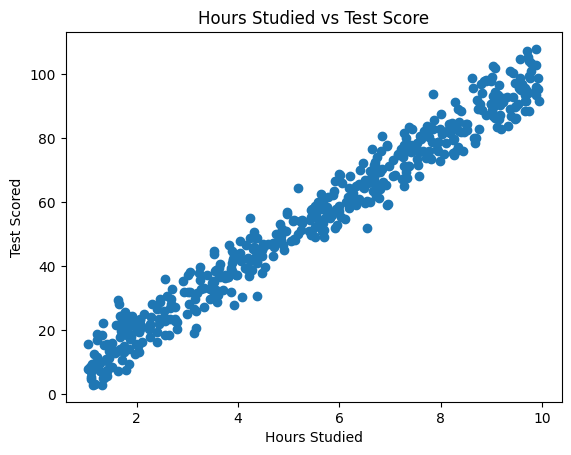

In [5]:
plt.scatter(data['Hours Studied'],data['Test Scored'])
plt.title("Hours Studied vs Test Score")
plt.xlabel("Hours Studied")
plt.ylabel("Test Scored")
plt.show()

In [6]:
corr_matrix=data.corr()
print(corr_matrix)

               Hours Studied  Test Scored
Hours Studied       1.000000     0.983399
Test Scored         0.983399     1.000000


In [ ]:
X=data[['Hours Studied']]
y=data['Test Scored']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


[[ 1.16538445]
 [-1.34392032]
 [-0.70946967]
 [ 0.52190423]
 [-1.63336545]
 [-1.38607156]
 [ 0.09191168]
 [ 0.42492518]
 [ 0.84779164]
 [-1.28136952]
 [ 0.66481458]
 [-0.03135087]
 [-1.54547545]
 [ 0.93900075]
 [ 1.52969923]
 [-0.55339539]
 [ 1.54465811]
 [-1.60025073]
 [-1.05875302]
 [-1.56663515]
 [ 0.51327892]
 [ 0.62449539]
 [ 0.1515568 ]
 [-0.04792928]
 [-0.00392862]
 [-0.36949917]
 [-0.58453485]
 [ 1.31738289]
 [ 1.04859513]
 [-0.85463796]
 [-1.11230382]
 [ 1.01557416]
 [-1.64083781]
 [ 1.02222554]
 [ 1.53061616]
 [-1.02733926]
 [ 1.32360326]
 [-0.15933908]
 [ 0.06989122]
 [ 0.79079817]
 [-1.21108887]
 [-1.66450922]
 [ 0.06435594]
 [ 0.89158116]
 [-0.62372374]
 [ 0.64477977]
 [-0.458726  ]
 [-1.36877655]
 [ 1.62274873]
 [-0.20786234]
 [-1.16079411]
 [ 1.00072865]
 [ 0.52966325]
 [-0.66604047]
 [ 0.80840687]
 [ 0.2735331 ]
 [ 0.31652778]
 [ 0.48664693]
 [ 1.30726753]
 [-0.38425168]
 [-0.71440122]
 [-1.15931726]
 [-0.51027739]
 [-1.52638047]
 [ 1.0614282 ]
 [ 1.55541773]
 [-1.01502

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [11]:
print("Coeffient:",model.coef_)
print("Intercept",model.intercept_)

Coeffient: [27.31629308]
Intercept 55.31588683514129


In [15]:
new_data=np.array([[6]])
new_data_df=pd.DataFrame(new_data,columns=['Hours Studied'])

new_data_scaled=scaler.transform(new_data_df)

single_prediction=model.predict(new_data_scaled)
print("Predicted Score after 60 Hours of Study:",single_prediction)

Predicted Score after 60 Hours of Study: [60.03282292]


In [17]:
y_pred=model.predict(X_test_scaled)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse)
print(r2)

26.105427937987933
0.9645671742510007


In [ ]:
#Saved Model

joblib.dump(model,'linear_regression_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
loaded_model=joblib.load("linear_regression_model.pkl")
loaded_scaler=joblib.load('scaler.pkl')

new_data=np.array([[6]])
new_data_df=pd.DataFrame(new_data,columns=['Hours Studied'])

new_data_scaled=scaler.transform(new_data_df)

single_prediction=model.predict(new_data_scaled)
print("Predicted Score after 60 Hours of Study:",single_prediction)

Predicted Score after 60 Hours of Study: [60.03282292 29.64486805]
